In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [27]:
data = pd.read_csv('/insurance.csv')

In [28]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


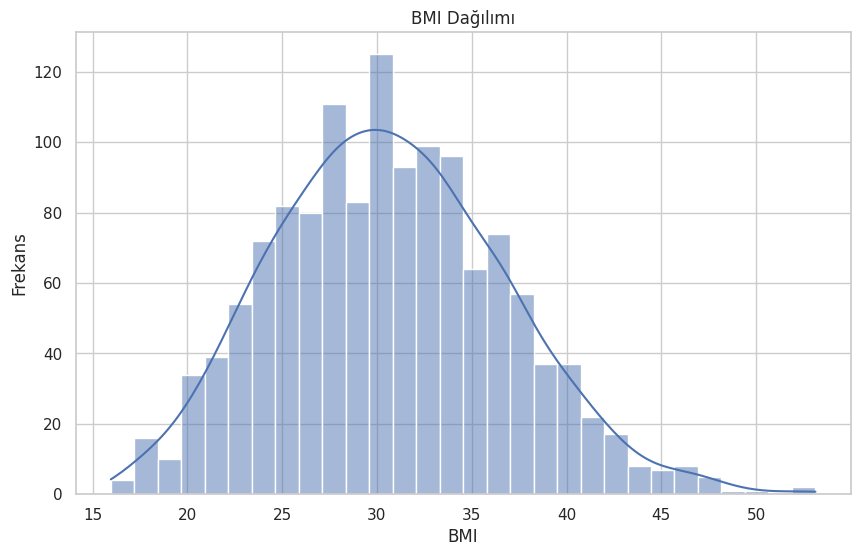

In [29]:
sns.set(style="whitegrid")

# BMI dağılımını çizdir
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title("BMI Dağılımı")
plt.xlabel("BMI")
plt.ylabel("Frekans")
plt.show()

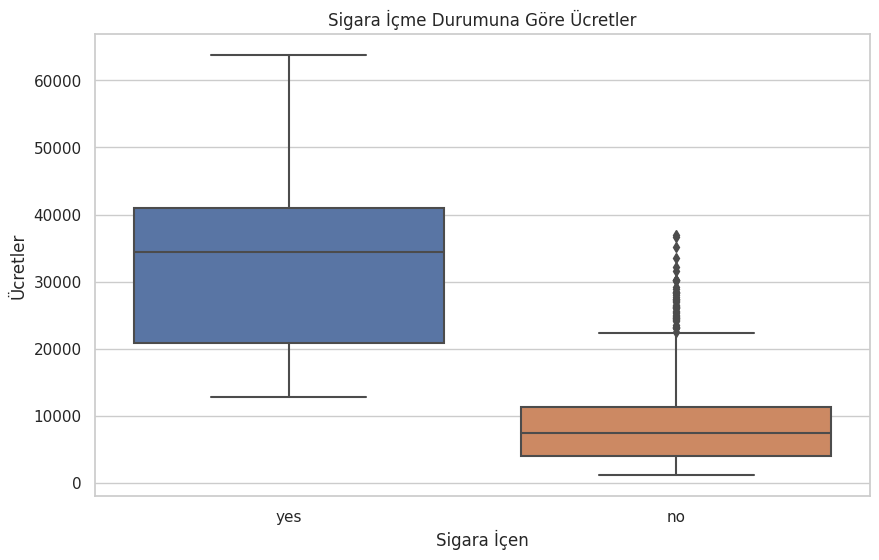

In [30]:
# Sigara içenlerin ve içmeyenlerin ücretlerini karşılaştır
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Sigara İçme Durumuna Göre Ücretler")
plt.xlabel("Sigara İçen")
plt.ylabel("Ücretler")
plt.show()
# sigara içenlerin harcamaları daha yüksek gözüküyor

In [31]:
# Sigara içme durumu ve bölge ilişkisi
cross_table = pd.crosstab(data['smoker'], data['region'])
print(cross_table)


region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


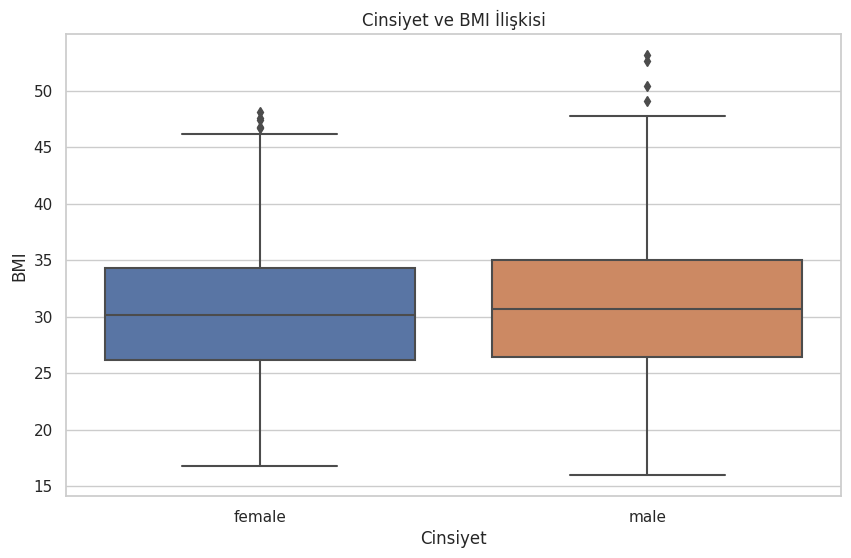

In [32]:
# Cinsiyet ile BMI ilişkisi
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=data)
plt.title("Cinsiyet ve BMI İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("BMI")
plt.show()
# kadın ve erkek arasında çok fazla fark yok

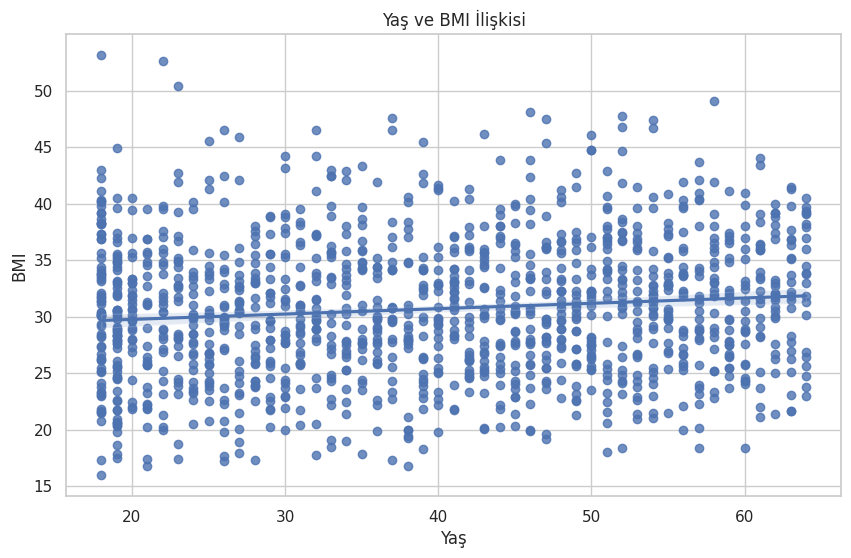

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='bmi', data=data)
plt.title("Yaş ve BMI İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("BMI")
plt.show()

<Figure size 1000x600 with 0 Axes>

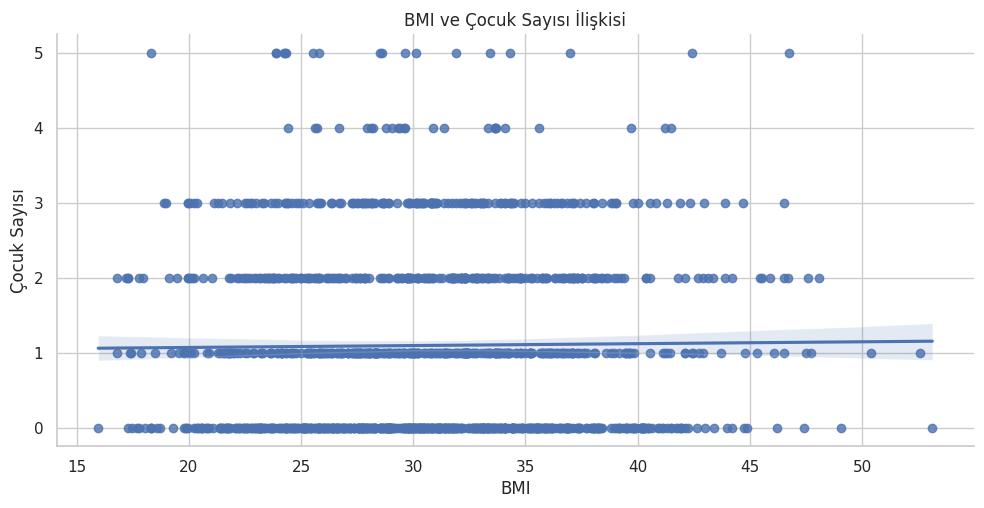

In [34]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='bmi', y='children', data=data, aspect=2)
plt.title("BMI ve Çocuk Sayısı İlişkisi")
plt.xlabel("BMI")
plt.ylabel("Çocuk Sayısı")
plt.show()

#  Vücut Kitle İndeksi (BMI) yüksek olan bireylerin genellikle daha fazla çocuğa olduğunu söyleyebiliriz

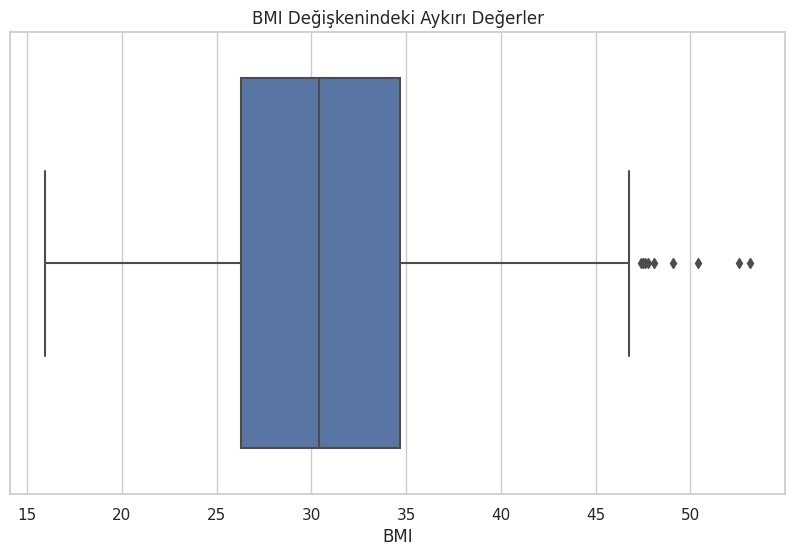

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [35]:
# BMI değişkenindeki aykırı değerleri inceleme
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bmi'])
plt.title("BMI Değişkenindeki Aykırı Değerler")
plt.xlabel("BMI")
plt.show()

# BMI değişkeninin istatistiksel özeti
bmi_stats = data['bmi'].describe()
print(bmi_stats)


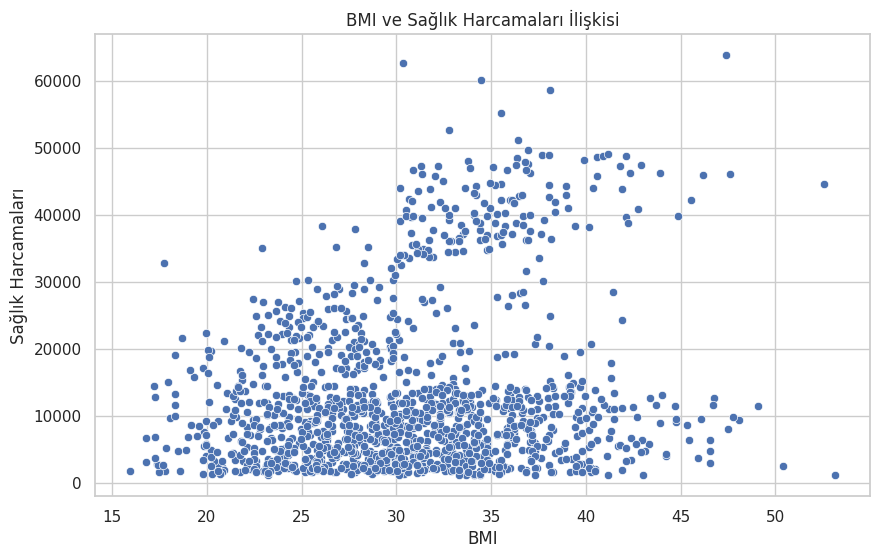

Pearson Korelasyon Katsayısı: 0.19834096883362895


In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title("BMI ve Sağlık Harcamaları İlişkisi")
plt.xlabel("BMI")
plt.ylabel("Sağlık Harcamaları")
plt.show()

# "BMI" ve "charges" arasındaki Pearson korelasyon katsayısını hesapla
correlation = data['bmi'].corr(data['charges'])
print("Pearson Korelasyon Katsayısı:", correlation)


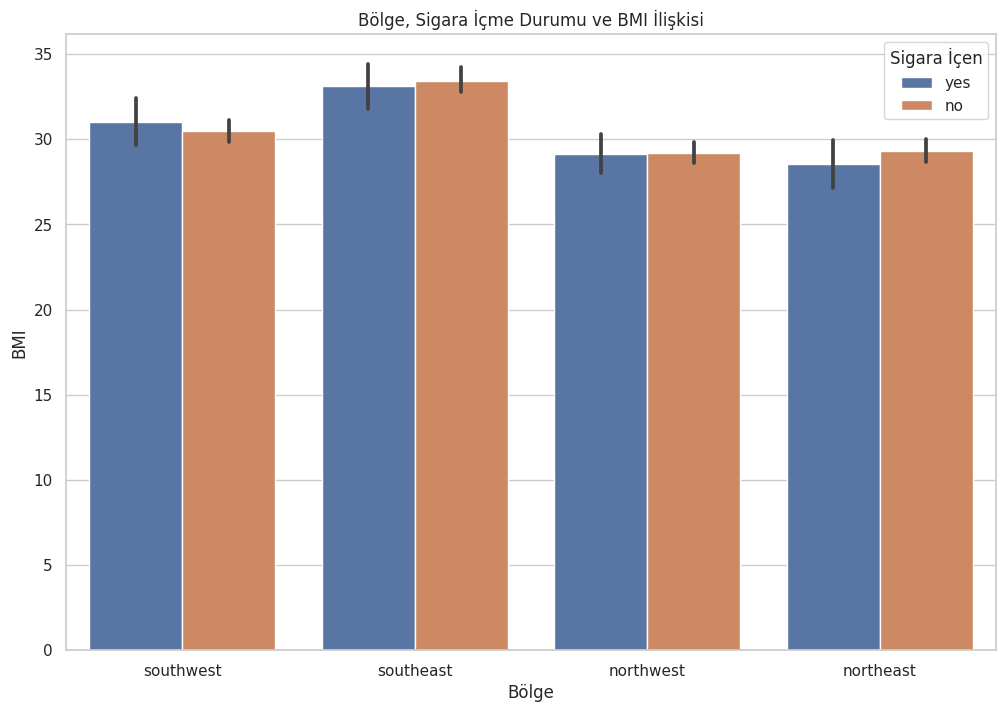

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='bmi', hue='smoker', data=data)
plt.title("Bölge, Sigara İçme Durumu ve BMI İlişkisi")
plt.xlabel("Bölge")
plt.ylabel("BMI")
plt.legend(title="Sigara İçen")
plt.show()


In [38]:
# Label encoding uygulandı
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])
data_encoded = pd.get_dummies(data, columns=['region'], prefix=['region'], drop_first=True)


In [39]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (X) ve hedef değişken (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Verileri eğitim ve test kümelerine bölündü
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test kümelerinin boyutları yazdırıldı
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1070, 8)
X_test shape: (268, 8)
y_train shape: (1070,)
y_test shape: (268,)


In [40]:
# Kategorik veriler üzerinde önce one-hot encoding uyguladım. Daha sonra X_train ve X_test üzerinde normalizing uygulandı
X_train_encoded = pd.get_dummies(X_train, columns=['sex', 'smoker','region'], prefix=['sex', 'smoker','region'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['sex', 'smoker','region'], prefix=['sex', 'smoker','region'], drop_first=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train_encoded)
X_test_normalized = scaler.transform(X_test_encoded)


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Veri yükleme
data = pd.read_csv("/insurance.csv")

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayrımı
X = data.drop("charges", axis=1)
y = data["charges"]

# Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# One-Hot Encoding
X_encoded = pd.get_dummies(X_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalleştirme
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Regresyon modeli oluşturma ve eğitim
regressor = LinearRegression()
regressor.fit(X_train_normalized, y_train)

# Model performansını değerlendirme
y_pred = regressor.predict(X_test_normalized)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Cross Validation ile model performansını inceleme
cv_scores = cross_val_score(regressor, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = -cv_scores
print("Cross Validation RMSE Scores:", cv_rmse_scores)

# En iyi modeli seçme
best_model = regressor if mse < cv_rmse_scores.mean() else RandomForestRegressor()


Mean Squared Error: 33596915.851361476
Cross Validation RMSE Scores: [40131832.9091839  32077034.53122963 35910188.22467399 46590418.12240702
 35029981.45664619]


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Veri yükleme
data = pd.read_csv("/insurance.csv")

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayrımı
X = data.drop("charges", axis=1)
y = data["charges"]

# Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# One-Hot Encoding
X_encoded = pd.get_dummies(X_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normalleştirme
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Regresyon modelini seç
model = RandomForestRegressor()

# Cross Validation ile model performansını inceleme
cv_scores = cross_val_score(model, X_train_normalized, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = -cv_scores
print("Cross Validation RMSE Scores:", cv_rmse_scores)

# En iyi modeli seçme
best_model = model

# Hiperparametre aralıklarını belirle
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV ile en iyi hiperparametreleri seç
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

# En iyi modeli ve hiperparametreleri al
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Test verileri üzerinde modelin performansını değerlendir
y_pred = best_model.predict(X_test_normalized)
mse = mean_squared_error(y_test, y_pred)
print("En iyi modelin Mean Squared Error:", mse)
print("En iyi modelin en iyi hiperparametreleri:", best_params)


Cross Validation RMSE Scores: [25660359.82918402 17116651.85615366 26431007.71344182 29705328.89424372
 25071246.19441017]
En iyi modelin Mean Squared Error: 18868693.025486916
En iyi modelin en iyi hiperparametreleri: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
